In [1]:
import timeit
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import glob
import time
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"] = (3,3)
import os
import sys
import numba
from scipy.optimize import curve_fit
import scipy.integrate as si
from scipy.integrate import quad

print(time.ctime())

Thu Sep  8 15:08:13 2022


In [2]:
file_path = ''

In [3]:
pairs_12 = np.load(file_path+'pairs1_2.npy')
pairs_14 = np.load(file_path+'pairs1_4.npy')

In [4]:
def gauss(x, A, t0, sigma, d):
    y = abs(A)*np.exp(-(x-t0)**2/(2.*abs(sigma)**2)) + d
    return y

In [5]:
def v_err(A,D,sigma_A,sigma_D):
    return (A/D)*np.sqrt((sigma_A/A)**2 + (sigma_D/D)**2)

In [6]:
nbins = 500

In [7]:
h12_total=np.histogram(pairs_12[:][:,1],bins=nbins)
h14_total=np.histogram(pairs_14[:][:,1],bins=nbins)

In [8]:
x = np.linspace(-20,20,nbins+1)

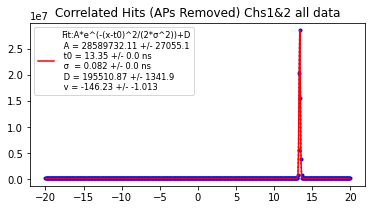

In [9]:
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Correlated Hits (APs Removed) Chs1&2 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h12_total[0], p0 = [10000, 1, 1, 58000])
#ax.hist(pairs_13[:][:,1],bins=600,histtype='step')
ax.plot(x[:-1], h12_total[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
#ax.set_xlim(-5000,5000)
#ax.set_ylim(40000,60000)
globals()["t0_12"] = ((best_vals[1]))
globals()["sigma_12"] = abs((best_vals[2]))
globals()["v_12"] = abs(best_vals[0]/best_vals[3])
plt.savefig(file_path+'results/ch12_peak.png')

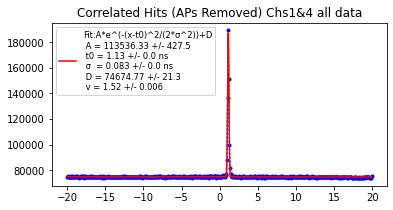

In [10]:
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Correlated Hits (APs Removed) Chs1&4 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h14_total[0], p0 = [10000, 1, 1, 58000])
#ax.hist(pairs_13[:][:,1],bins=600,histtype='step')
ax.plot(x[:-1], h14_total[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
#ax.set_xlim(-5000,5000)
#ax.set_ylim(40000,60000)
globals()["t0_13"] = ((best_vals[1]))
globals()["sigma_13"] = abs((best_vals[2]))
globals()["v_13"] = abs(best_vals[0]/best_vals[3])
plt.savefig(file_path+'results/ch13_peak.png')

In [11]:
def getTriples():
    
    pairs_124_t1=[]
    pairs_124_t2=[]
    pairs_124_t4=[]

    for i in range(len(pairs_12)):
        
        t1=pairs_12[i,0]
        dt_12=pairs_12[i,1]   
        
        j1=np.searchsorted(pairs_14[:,0],t1,side='left')
        j2=np.searchsorted(pairs_14[:,0],t1,side='right')
        
        if j1 != j2: # Entry is present
            pairs_124_t1.append(t1)
            pairs_124_t2.append(t1+dt_12)
            pairs_124_t4.append(t1+pairs_14[j1,1])
            
        if (i%10000000==0 and i != 0):
            print ("i=",i," pairs_123.size=",len(pairs_124_t1))
        
        
    
    return (pairs_124_t1,pairs_124_t2,pairs_124_t4)
 


In [ ]:
%time (pairs_124_t1,pairs_124_t2,pairs_124_t4)=getTriples()

In [ ]:
pairs124=np.column_stack((pairs_124_t1,pairs_124_t2,pairs_124_t3))

np.save("pairs124.npy",pairs124)

In [ ]:
pairs_124_dt12=np.subtract(pairs_123_t2,pairs_123_t1)
pairs_124_dt14=np.subtract(pairs_123_t4,pairs_123_t1)
pairs_124_dt24=np.subtract(pairs_123_t4,pairs_123_t2)

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))

_=ax.hist(pairs_124_dt24,bins=100,range=(-12600,-12000))
ax.set_title("Δt_23 Histogram",fontsize=14)

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize = (20,10))

_=ax[0].hist(pairs_123_dt12,bins=100,range=(12900,13900))
ax[0].set_title("Δt_12 Histogram",fontsize=14)

ax[1].set_title("Δt_13 Histogram",fontsize=14)
_=ax[1].hist(pairs_123_dt13,bins=100,range=(700,1500))


ax[0].set_xlabel("time, ps",fontsize=14)
ax[1].set_xlabel("time, ps",fontsize=14)

ax[0].set_ylabel("Entries",fontsize=14)

In [ ]:

dt12_window=np.logical_and(pairs_123_dt12>13000,pairs_123_dt12<13700)
dt13_window=np.logical_and(pairs_123_dt13>500,pairs_123_dt13<1500)


peaks_isolated=np.logical_and(dt12_window,dt13_window)




In [ ]:
pairs_123_t1_peaks=np.array(pairs_123_t1)[peaks_isolated]
pairs_123_t2_peaks=np.array(pairs_123_t2)[peaks_isolated]
pairs_123_t3_peaks=np.array(pairs_123_t3)[peaks_isolated]

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
_=ax.hist(pairs_123_t1_peaks,bins=238)
ax.set_title("Peak extracted triplet rates, 10s bins",fontsize=14)
ax.set_xlabel("time, ps",fontsize=14)
ax.set_ylabel("Entries",fontsize=14)

In [ ]:
(pairs_123_t1_peaks[len(pairs_123_t1_peaks)-1]-pairs_123_t1_peaks[0])/1e12

In [ ]:
pairs_123_dt12_peaks=np.subtract(pairs_123_t2_peaks,pairs_123_t1_peaks)
pairs_123_dt13_peaks=np.subtract(pairs_123_t3_peaks,pairs_123_t1_peaks)

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
_=ax.scatter(pairs_123_dt12,pairs_123_dt13,s=1)
plt.xlabel('dt12',fontsize=14)
plt.ylabel('dt13',fontsize=14)
plt.title('Scatter plot of dt12 vs dt13 around their respective HBT peaks',fontsize=14)
plt.xlim(12000,15000)
plt.ylim(-500,2500)

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))

_=ax.hist2d(pairs_123_dt12,pairs_123_dt13,bins=(np.arange(-20000, 20000, 100),np.arange(-20000, 20000, 100)))
fig.colorbar(_[3], ax = ax) 
plt.xlabel('dt12')
plt.ylabel('dt13')
plt.title('2D histogram of dt12 vs dt13 in full 40ns scale',fontsize=14)
plt.xlim(10000,17000)
plt.ylim(-2500,4500)

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (20,20))
fig.delaxes(ax[0,0])

ax[1,1].hist2d(pairs_123_dt12,pairs_123_dt13,bins=(np.arange(-20000, 20000, 10),np.arange(-20000, 20000, 10)))
ax[1,1].set_xlim(10000,17000)
ax[1,1].set_ylim(-2500,4500)


_=ax[0,1].hist(pairs_123_dt12,bins=range(10000,17000,10),range=(10000,17000,10))
ax[0,1].set_xlim([10000,17000])
ax[0,1].set_title("dt 12",fontsize=15)


_=ax[1,0].hist(pairs_123_dt13,bins=range(-2500,4500,10),range=(-2500,4500,10), orientation=u'horizontal')
ax[1,0].set_ylabel("dt 13",fontsize=15)


ax[1,0].invert_xaxis()  # labels read top-to-bottom
ax[1,0].set_ylim([-2500,4500])

#ax2 = ax[1,0].twinx()
#ax2.set_ylim(ax.get_ylim())
#ax2.set_yticks(y_pos)
#ax2.set_yticklabels(people)

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (20,20))



_=ax[0,0].hist(pairs_123_dt23,bins=range(-12600,-12000,10),range=(-12600,-12000,10))
ax[0,0].set_title("Δt_23 Histogram",fontsize=14)


ax[1,1].hist2d(pairs_123_dt12,pairs_123_dt13,norm=mpl.colors.LogNorm(),bins=(np.arange(-20000, 20000, 10),np.arange(-20000, 20000, 10)))
ax[1,1].set_xlim(10000,17000)
ax[1,1].set_ylim(-2500,4500)
ax[1,1].set_title('log scale')
ax[1,1].set_xlabel("dt12")
ax[1,1].set_ylabel("dt13")

_=ax[0,1].hist(pairs_123_dt12,bins=range(10000,17000,10),range=(10000,17000,10))
ax[0,1].set_xlim([10000,17000])
ax[0,1].set_title("dt 12",fontsize=15)


_=ax[1,0].hist(pairs_123_dt13,bins=range(-2500,4500,10),range=(-2500,4500,10), orientation=u'horizontal')
ax[1,0].set_ylabel("dt 13",fontsize=15)


ax[1,0].invert_xaxis()  # labels read top-to-bottom
ax[1,0].set_ylim([-2500,4500])

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (20,20))



_=ax[0,0].hist(pairs_123_dt13,bins=range(-2500,4500,10),range=(-2500,4500,10))
ax[0,0].set_title("Δt_13 Histogram",fontsize=14)


ax[1,1].hist2d(pairs_123_dt12,pairs_123_dt23,norm=mpl.colors.LogNorm(),bins=(np.arange(-20000, 20000, 10),np.arange(-20000, 20000, 10)))
ax[1,1].set_xlim(11000,16000)
ax[1,1].set_ylim(-15000,-10000)
ax[1,1].set_title('log scale')

ax[1,1].set_xlabel("Δt12")
ax[1,1].set_ylabel("Δt23")

_=ax[0,1].hist(pairs_123_dt12,bins=range(11000,16000,10),range=(11000,16000,10))
ax[0,1].set_xlim([11000,16000])
ax[0,1].set_title("Δt 12",fontsize=15)

_=ax[1,0].hist(pairs_123_dt23,bins=range(-15000,-10000,10),range=(-15000,-10000,10), orientation=u'horizontal')
ax[1,0].set_ylabel("Δt 23",fontsize=15)


ax[1,0].invert_xaxis()  # labels read top-to-bottom
ax[1,0].set_ylim([-15000,-10000])

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (20,20))



_=ax[0,0].hist(pairs_123_dt12,bins=range(11000,16000,10),range=(11000,16000,10))
ax[0,0].set_title("Δt_12 Histogram",fontsize=14)


ax[1,1].hist2d(pairs_123_dt13,pairs_123_dt23,norm=mpl.colors.LogNorm(),bins=(np.arange(-20000, 20000, 10),np.arange(-20000, 20000, 10)))
ax[1,1].set_xlim(-1500,3500)
ax[1,1].set_ylim(-15000,-10000)
ax[1,1].set_title('log scale')

ax[1,1].set_xlabel("Δt13")
ax[1,1].set_ylabel("Δt23")

_=ax[0,1].hist(pairs_123_dt13,bins=range(-1500,3500,10),range=(-1500,3500,10))
ax[0,1].set_xlim([-1500,3500])
ax[0,1].set_title("Δt 13",fontsize=15)

_=ax[1,0].hist(pairs_123_dt23,bins=100,range=(-15000,-10000), orientation=u'horizontal')
ax[1,0].set_ylabel("Δt 23",fontsize=15)


ax[1,0].invert_xaxis()  # labels read top-to-bottom
ax[1,0].set_ylim([-15000,-10000])